# KF-based Alignment
Small MC-based studies

## Single Sensor, Single Translation
As a first pass and simple confirmation of what I've done before, I am going to see how alignment goes after moving the Axial sensor in Layer 3 Top down by 69um.
Specifically, I am adding `-0.069` to the `11105` parameter in `compact.xml`.

Generally, it looks like MP is perfectly aligning the floated parameter to the naive mean of that parameter's residuals. Emphasis on naive - the simple mean is dragged towards zero (away from the actual misalignment) due to some other effect. I think that the tracks populating the near-zero residual region _could_ be tracks that simply omit the misaligned sensor.

Deduced Alignment Parameters: -49.788 -> -14.122 -> -3.6554 -> -1.0423 -> -0.27308

Total Alignment Parameter: -68.8808

In [40]:
d = Differ('L3TAxial $\Delta u = -69 \mu$m',
           ('data/kf/L3TAxial_iter0/gblplots.root','iter0 $-49.788\mu$m'),
           ('data/kf/L3TAxial_iter1/gblplots.root','iter1 $-14.122\mu$m'),
           ('data/kf/L3TAxial_iter2/gblplots.root','iter2 $-3.6554\mu$m'),
           ('data/kf/L3TAxial_iter3/gblplots.root','iter3 $-1.0423\mu$m'),           
           ('data/kf/L3TAxial_iter4/gblplots.root','iter4 $-0.27308\mu$m'),           
          )

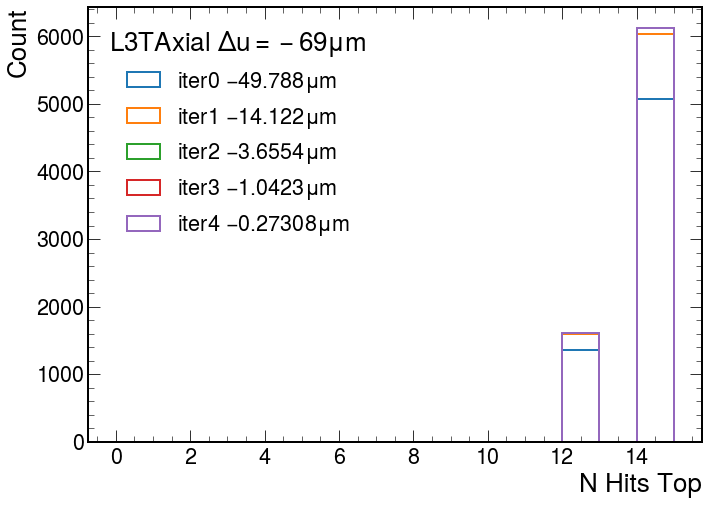

In [41]:
d.plot1d('trk_params/nHits_top','N Hits Top',ylabel='Count',yscale='linear',legend_kw=dict(loc='upper left'))

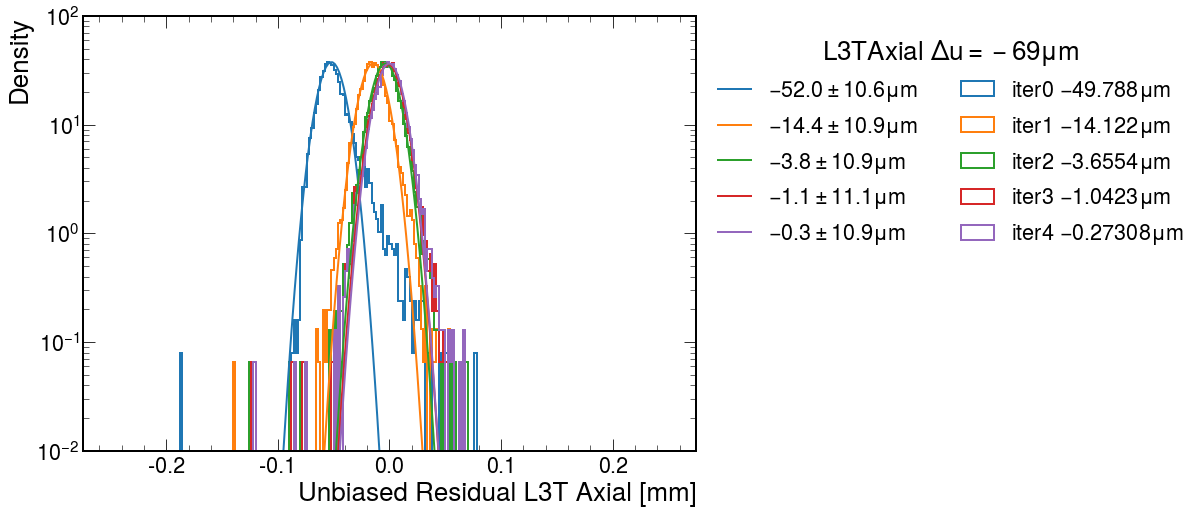

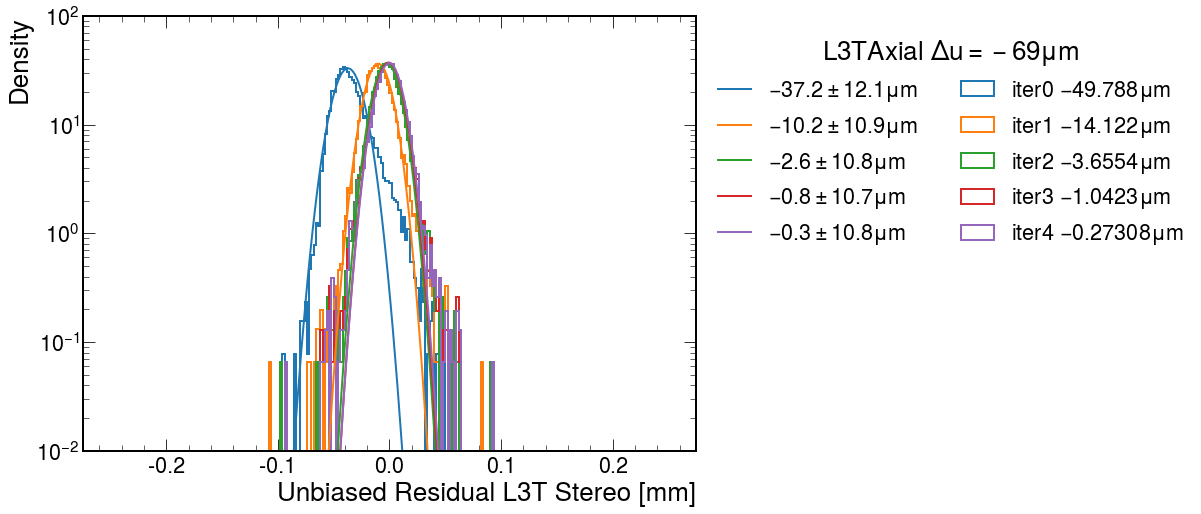

In [43]:
sensors = [
    ('L3T Axial', 'res/uresidual_GBL_module_L3t_halfmodule_axial_sensor0'),
    ('L3T Stereo', 'res/uresidual_GBL_module_L3t_halfmodule_stereo_sensor0'),
]
for name, hist in sensors :
    d.plot1d(hist, f'Unbiased Residual {name} [mm]', ylabel='Density', 
             yscale='log', ylim = (0.01,100),
             #yscale='linear',
            include_mean = 'iterative', draw_mean = True, density = True,
            legend_kw=dict(loc='upper left',bbox_to_anchor=(1.,1.), ncol=2),
            #|out_dir = os.getcwd()
            )

## Single Sensor, Rotation around W
Colloquially known as `rw`. I am going to rotate the axial sensor in Layer 4 by 10mrad. Specifically, I am add `+0.010` to the `12307` parameter in `compact.xml`.

Threshold for stopping angular iterations is ~0.1mrad

Deduced Alignment Parameters: 6.4573 -> 2.4356 -> 0.79673 -> 0.25975

Total Alignment Parameter: 9.94938

In [45]:
d = Differ('L4T Axial rW 10 mrad',
           ('data/kf/L4TAxial_rw_iter0/gblplots.root','iter0: 6.4573 mrad'),
           ('data/kf/L4TAxial_rw_iter1/gblplots.root','iter1: 2.4356 mrad'),
           ('data/kf/L4TAxial_rw_iter2/gblplots.root','iter2: 0.79673 mrad'),
           ('data/kf/L4TAxial_rw_iter3/gblplots.root','iter3: 0.25975 mrad'),
           ('data/kf/L4TAxial_rw_iter4/gblplots.root','iter4: 0.081306 mrad'),
          )

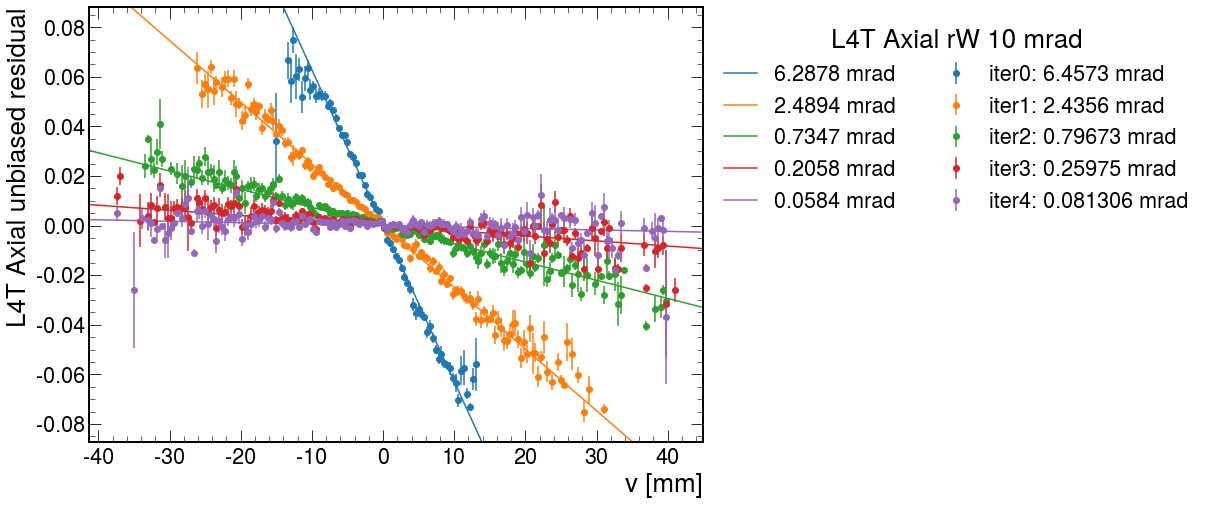

In [48]:
d.plot2d_profile_overlay('res/uresidual_GBL_vs_v_pred_module_L4t_halfmodule_axial_sensor0',
                         xlabel='v [mm]', ylabel = 'L4T Axial unbiased residual',
                         line_fit = True, draw_line = True,
                         legend_kw = dict(loc='upper left',bbox_to_anchor=(1,1),ncol=2),
                         #out_dir = 'data/kf/'
                        )

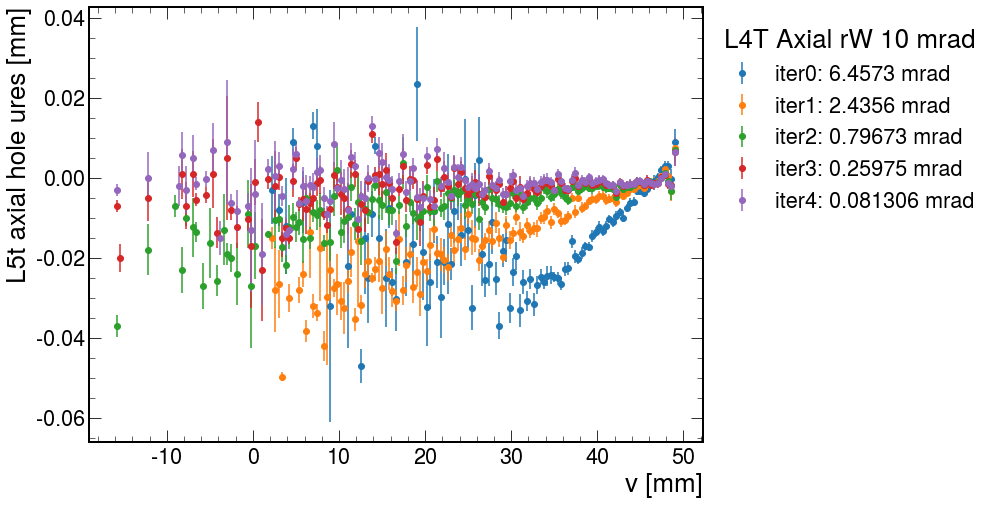

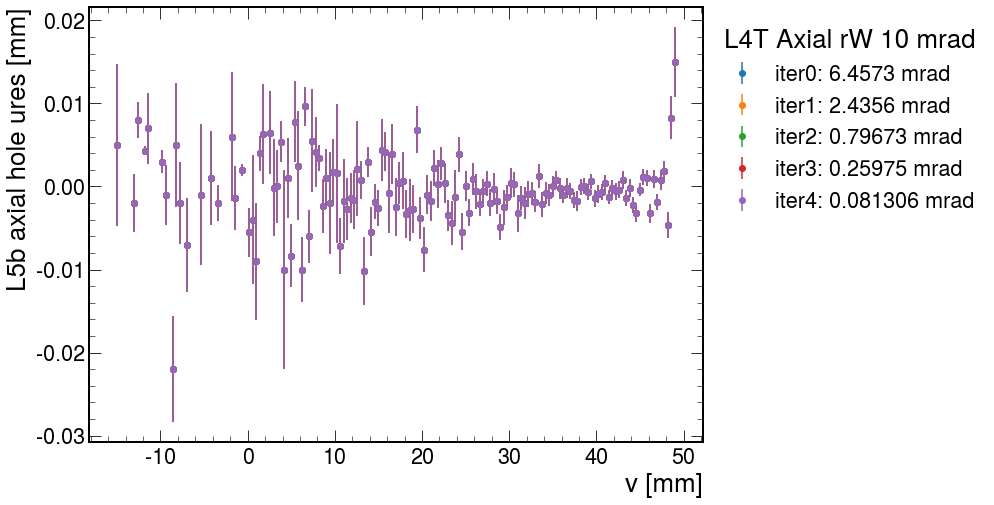

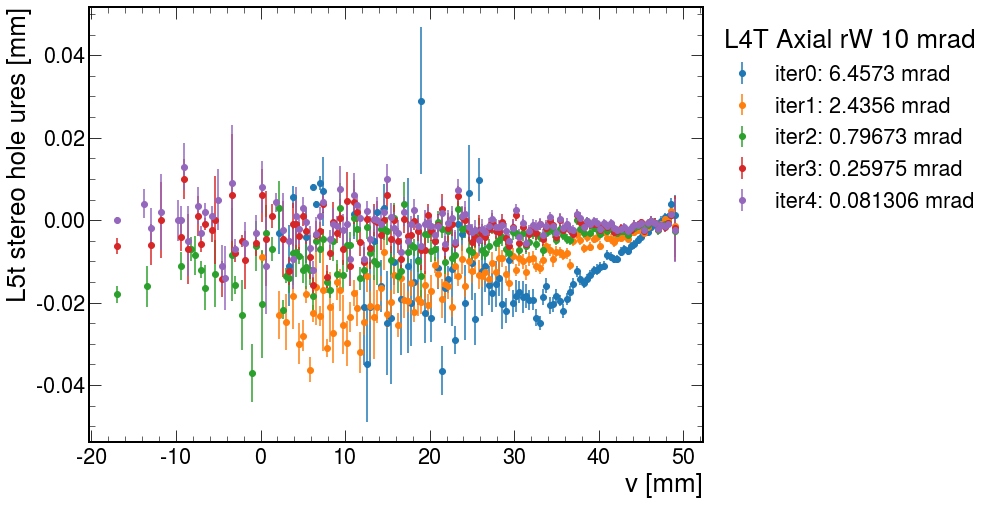

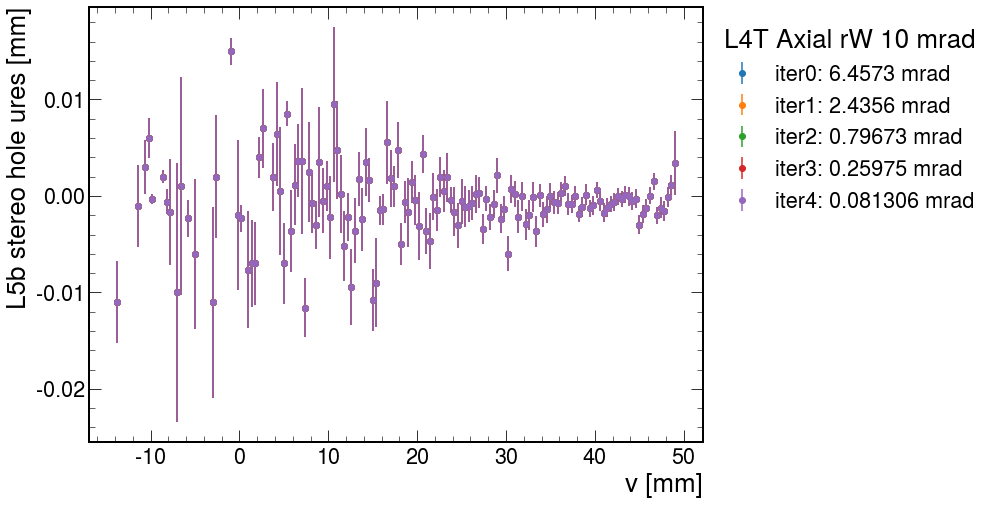

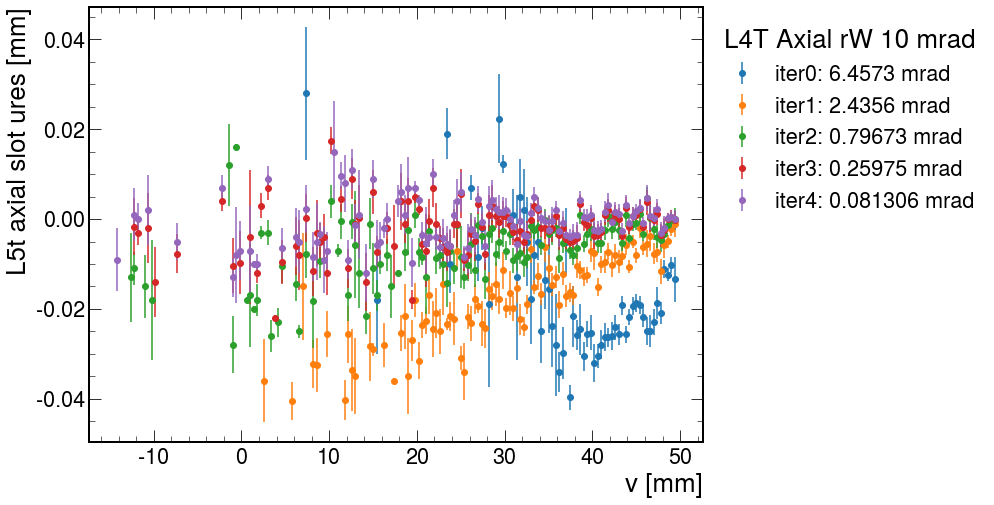

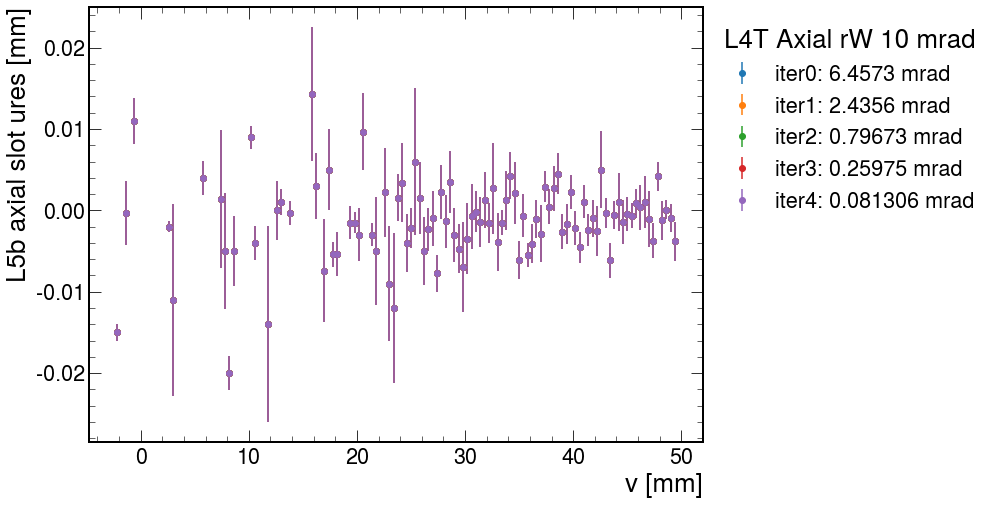

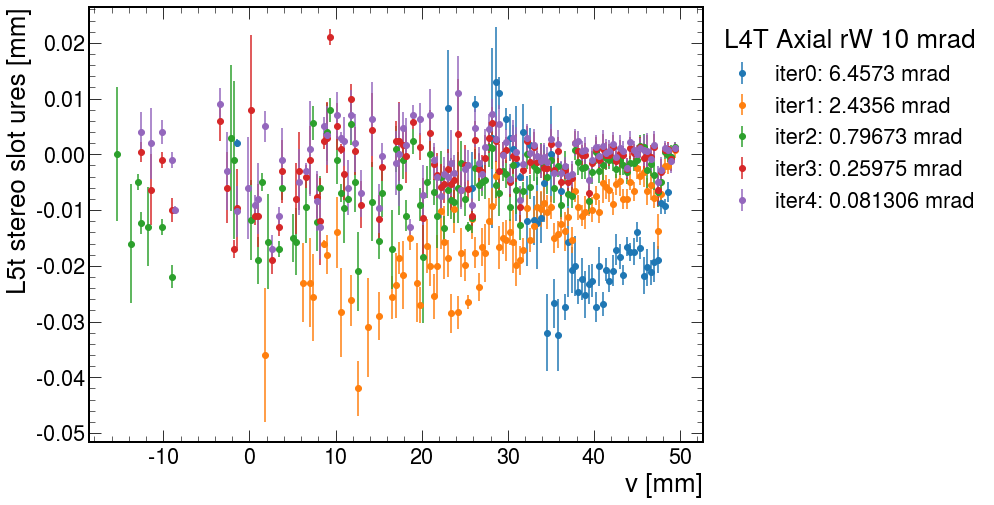

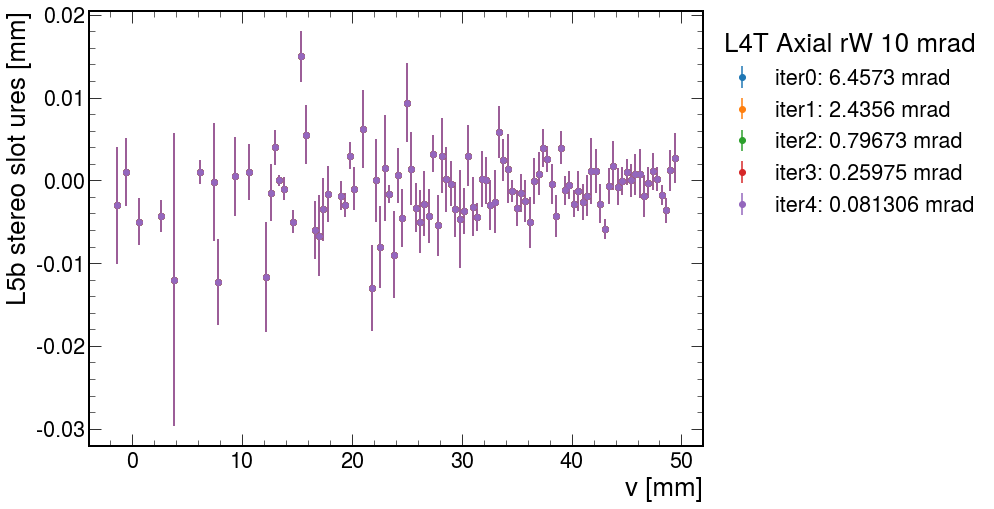

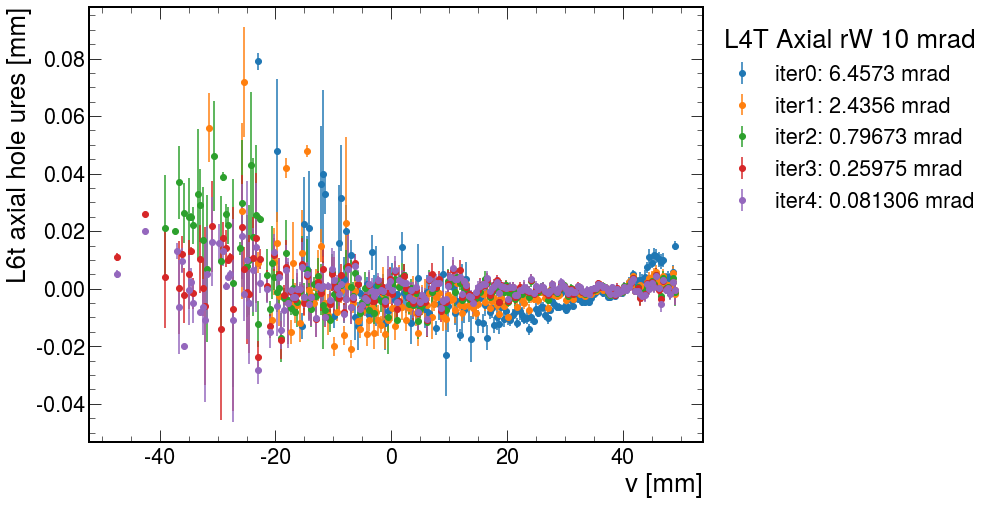

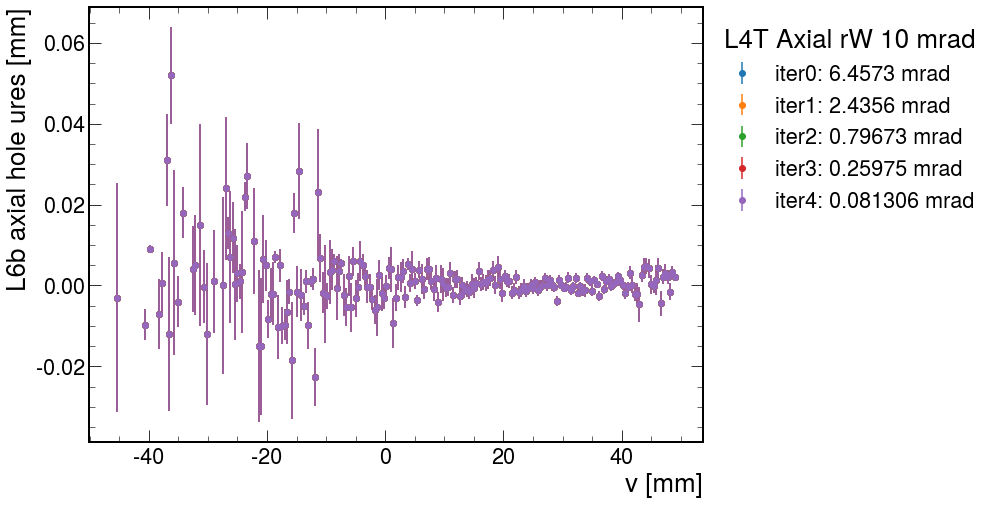

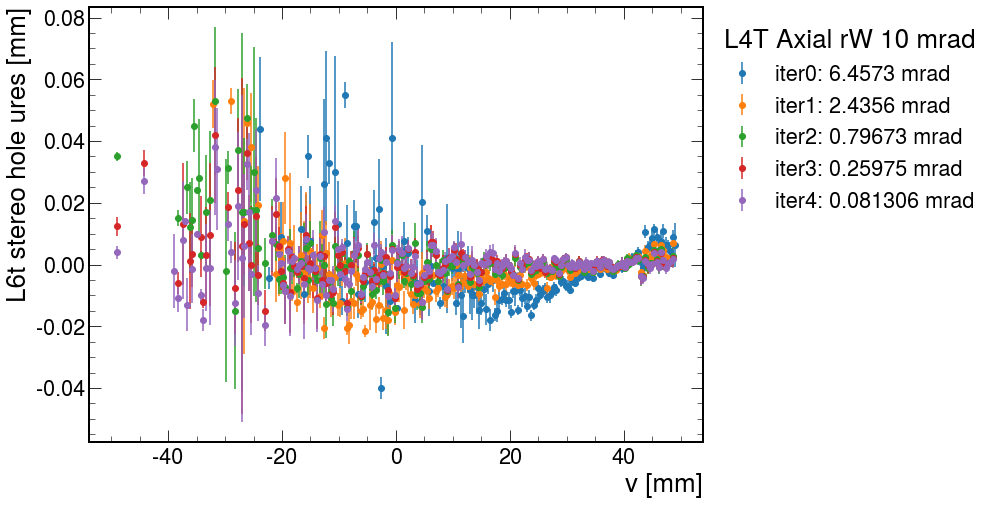

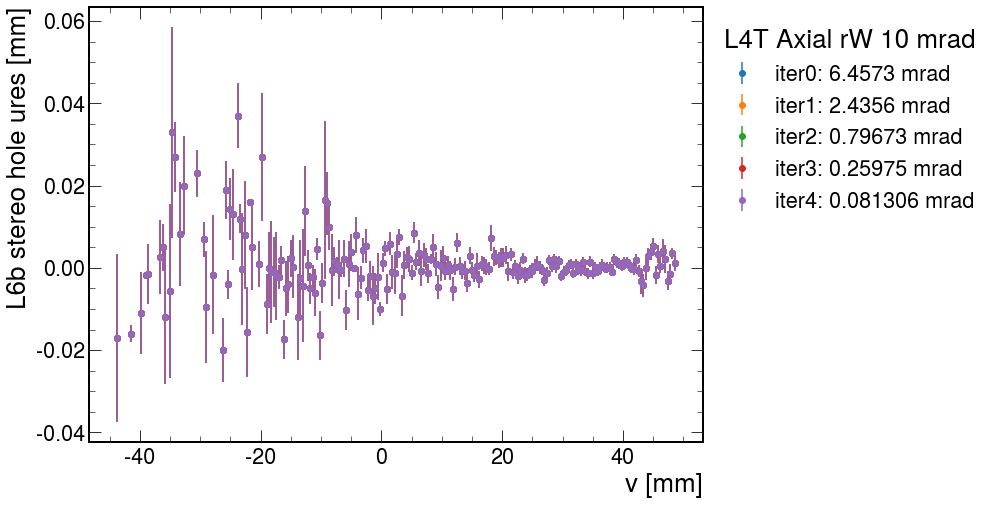

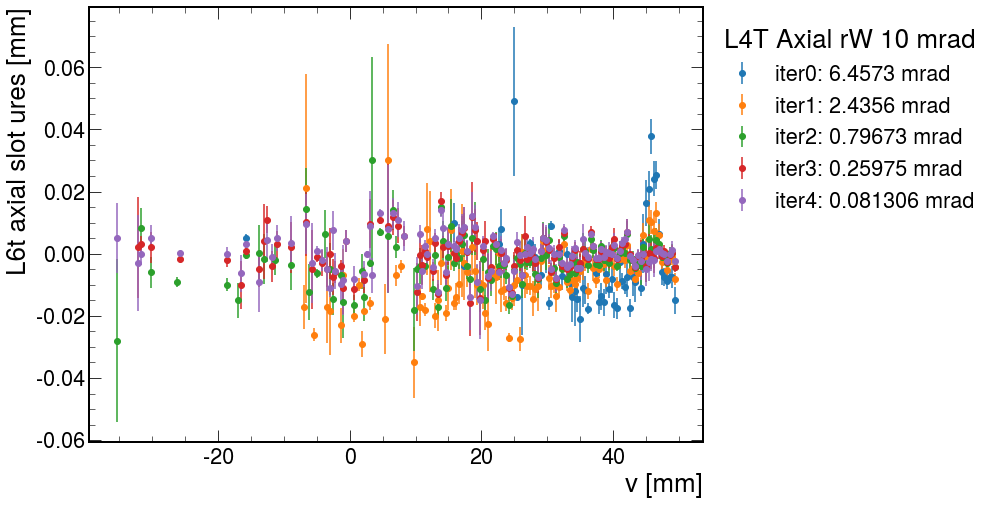

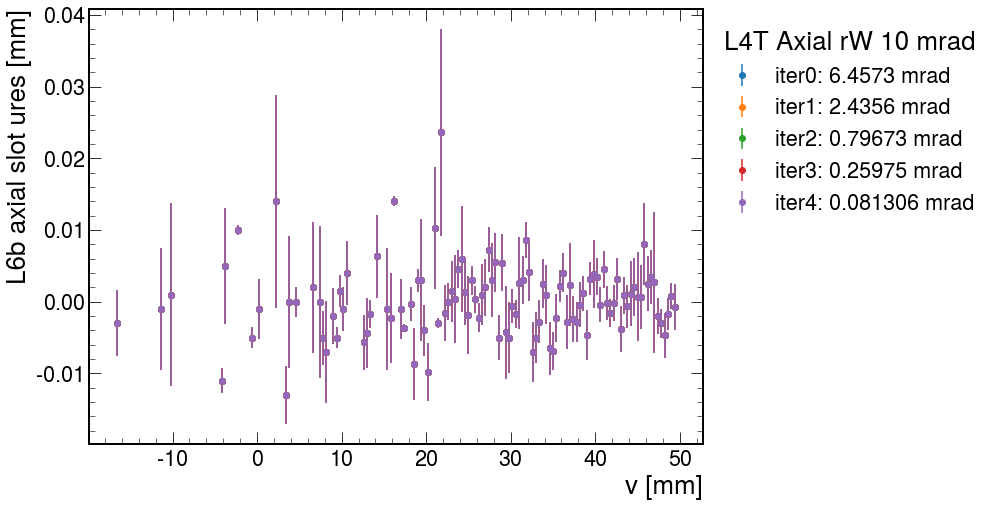

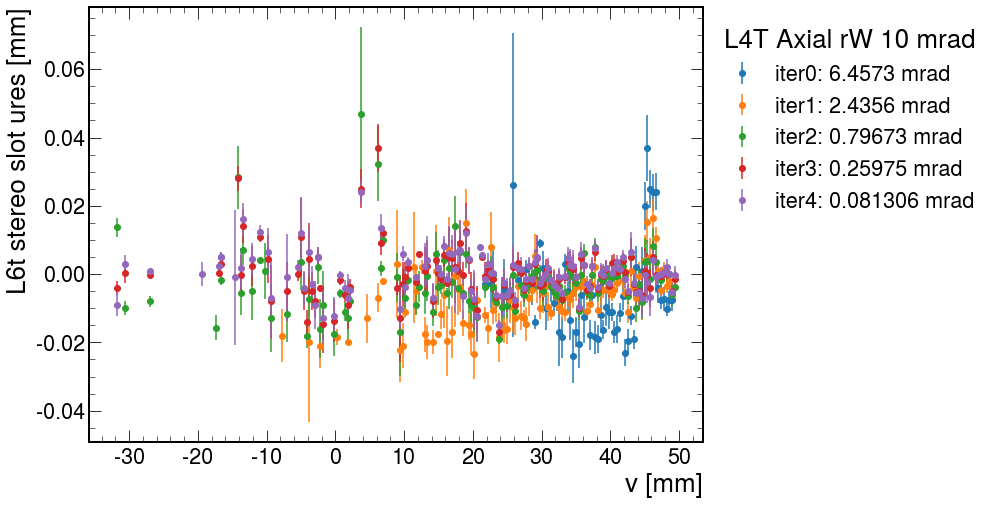

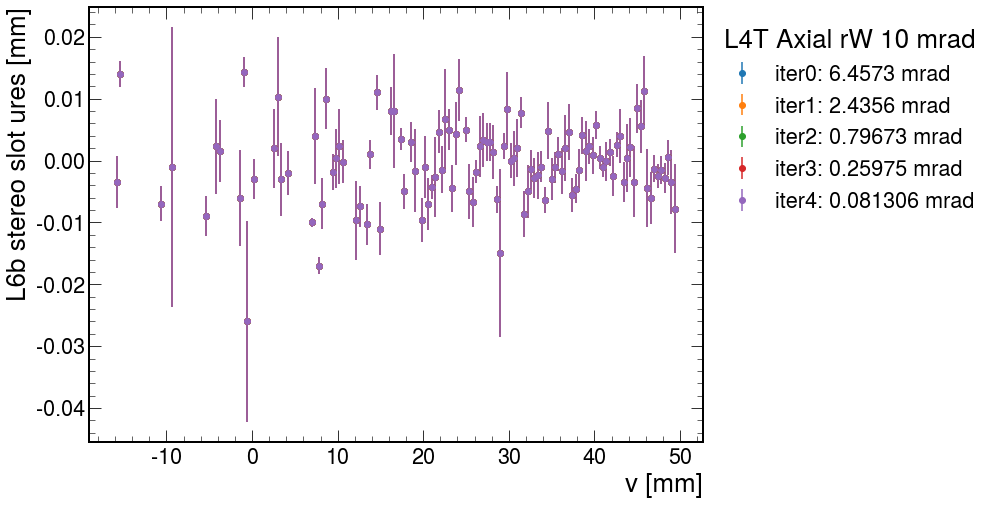

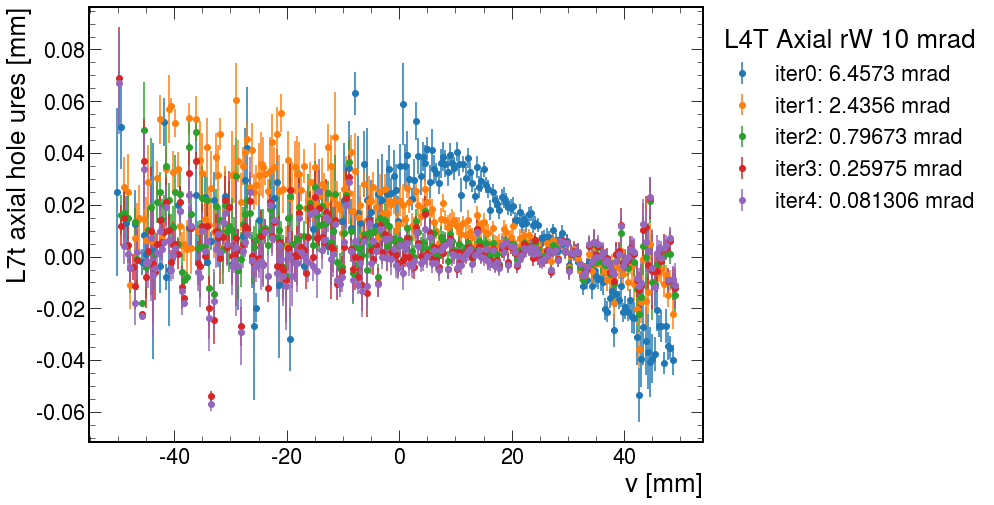

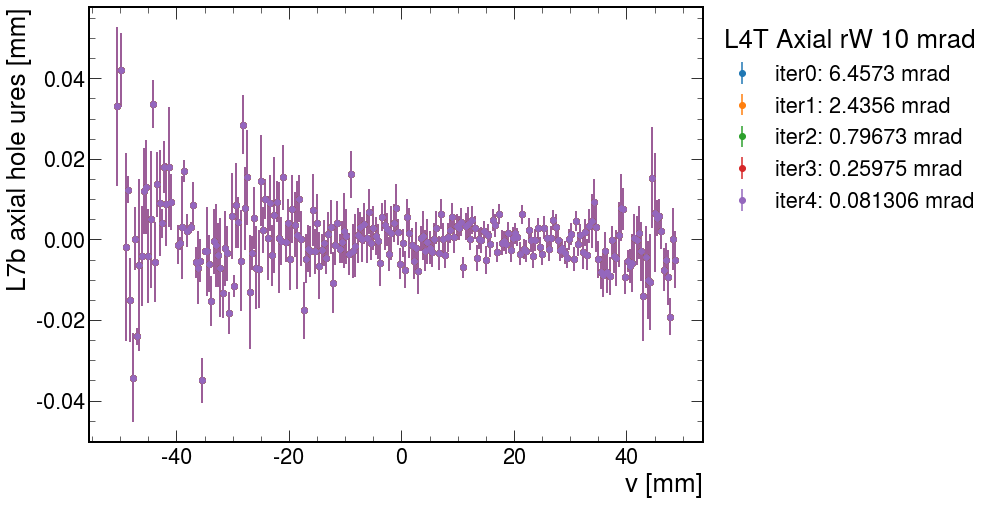

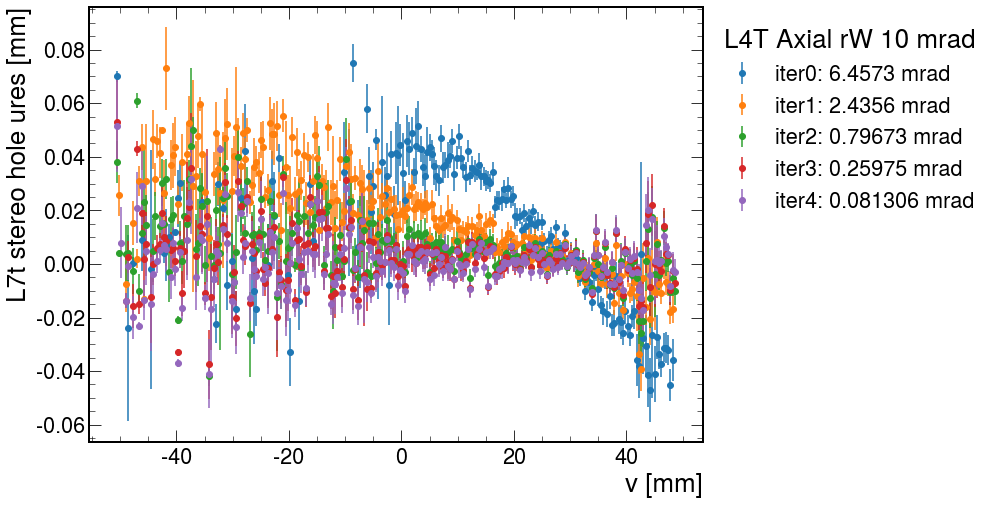

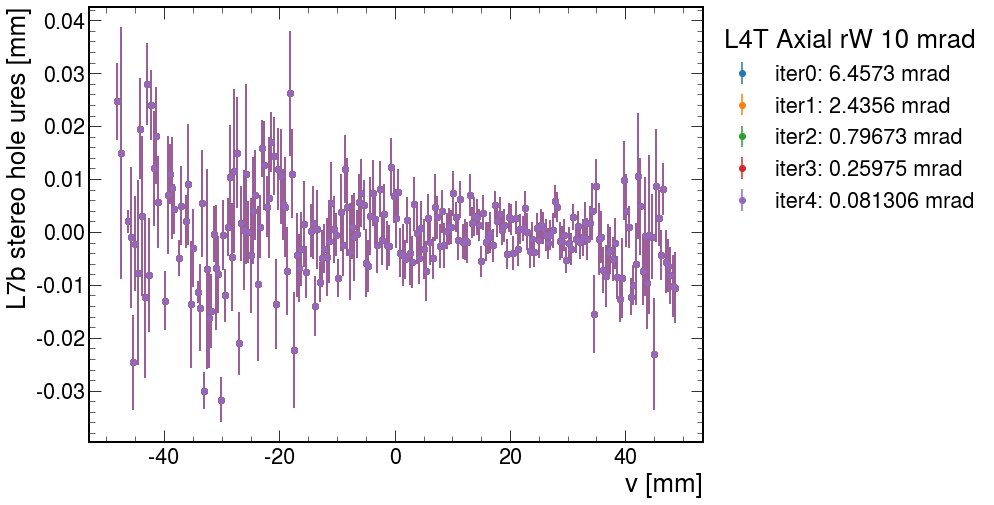

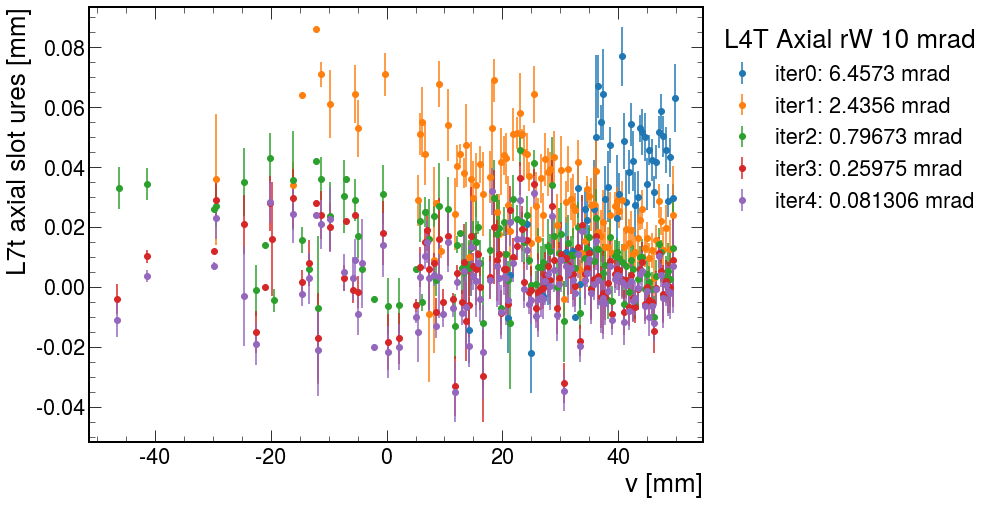

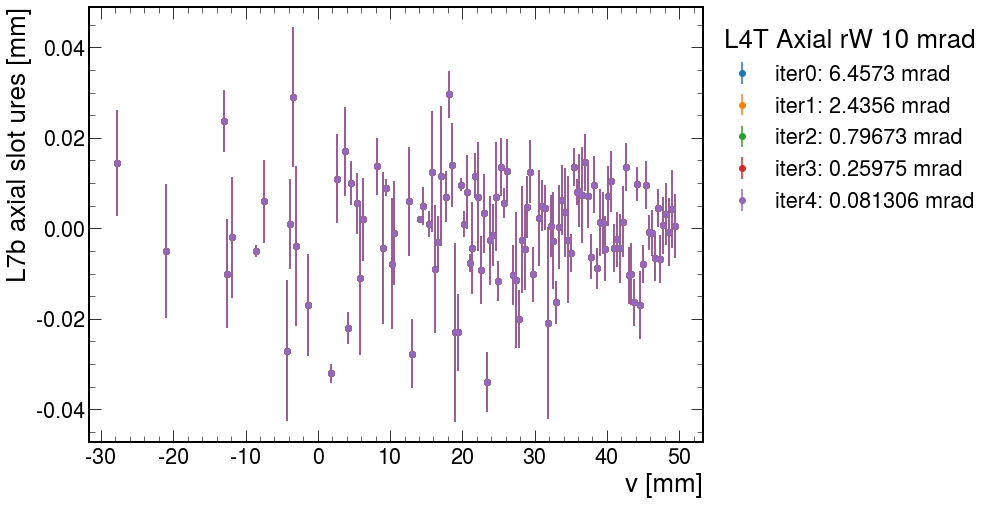

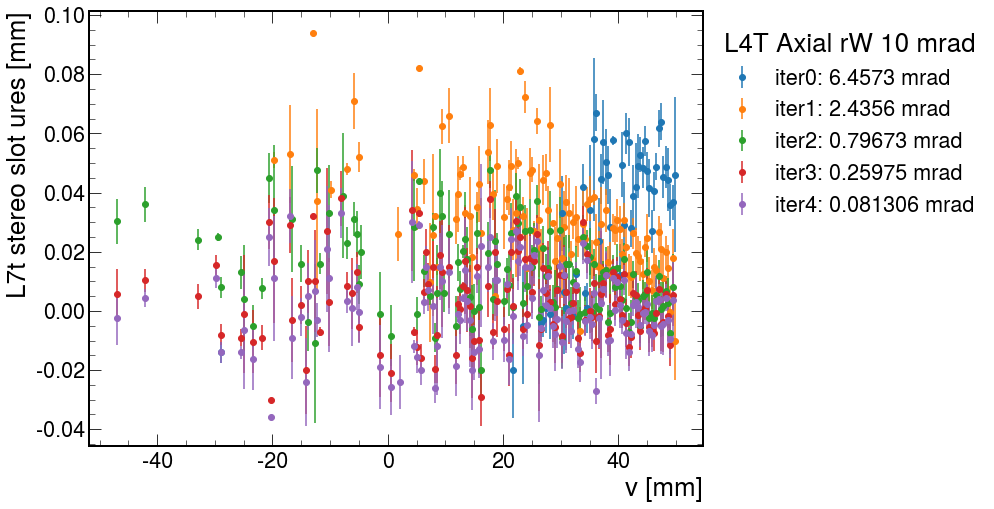

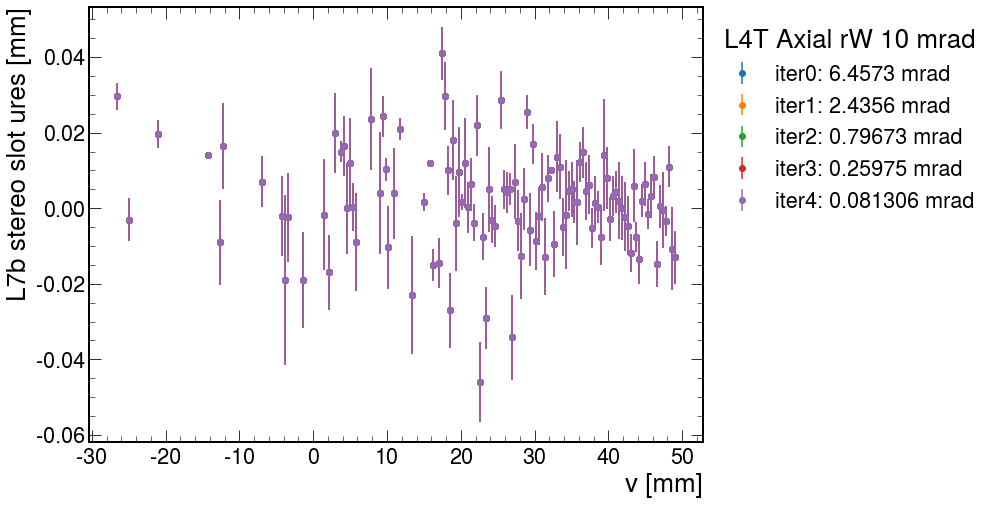

In [37]:
sensors = [
    (f'L{l}{tb} {t} {sh}', f'res/uresidual_GBL_vs_v_pred_module_L{l}{tb}_halfmodule_{t}_{sh}_sensor0')
    for l in range(5,8)
    for sh in ['hole','slot']
    for t in ['axial','stereo']
    for tb in ['t','b']
]
for name, hist in sensors :
    d.plot2d_profile_overlay(hist, xlabel='v [mm]', ylabel = f'{name} ures [mm]',
                             legend_kw = dict(loc='upper left', bbox_to_anchor=(1,1)))

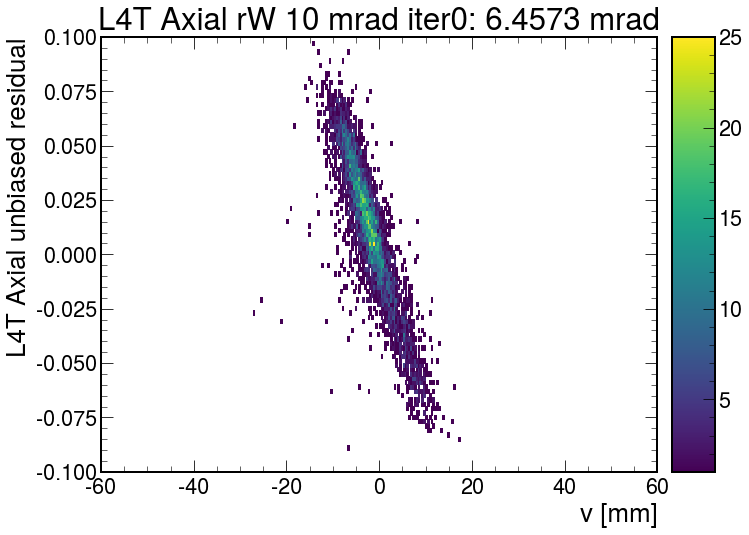

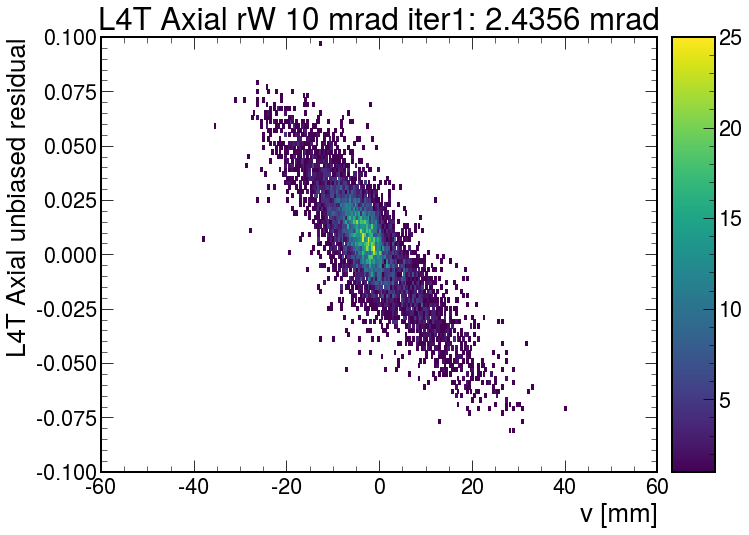

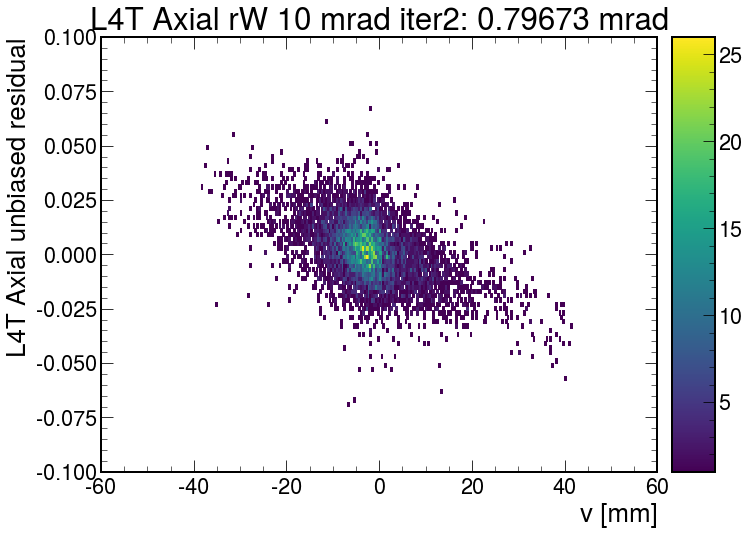

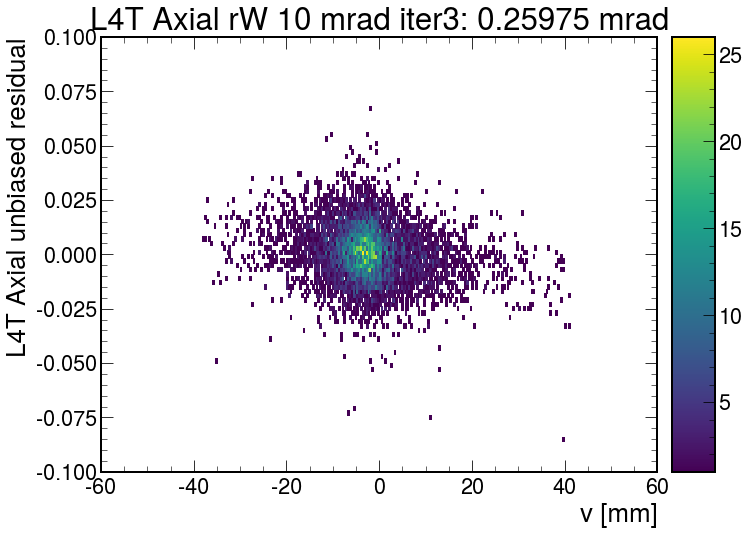

In [8]:
d.plot2d_separate('res/uresidual_GBL_vs_v_pred_module_L4t_halfmodule_axial_sensor0',
                 xlabel='v [mm]', ylabel = 'L4T Axial unbiased residual')

## Questions
- What is `AlignmentTree.json` and do I need it?
  - pass structures to pede (i.e. tell pede derivatives)
  - only useful for attempting to align w.r.t. to CoM
  - refreshed on every detector iteration
- What about `mille_constraint.txt`?
  - pass linear sums to pede
  - align sensors and global structure at same time, sum must be zero
- Your updates to hps-mille
  - check on Monday

## Next Steps
- Translation (50um) + Rotation (2mrad) in one sensor L3/4
- Confirm Cam+Sara => ures vs v in L5-7
  - for tuesday (if possible)
- Random misalignment => try to realign (without looking at generation)
  - include several sensors
  - float more parameters
- Try running on data

# L3Stereo Translation (50um) + Rotation (2mrad)
11106 changed by `- 0.050` and 12306 changed by `+ 0.002`

How the parameters changed through iterations:

Parameter | iter0 | iter1 | iter2 | iter3 | Total
---|---|---|---|---|---
11106 | 35.778 | 10.25 | 2.9095 | 0.80198 | 49.73948
12306 | -1.4261 | -0.42548 | -0.080345 | -0.021751 | -1.953676

In [1]:
from _differ import Differ
%matplotlib inline
import mplhep
import matplotlib.pyplot as plt
plt.style.use(mplhep.style.ROOT)
import os

In [2]:
d = Differ(
    'L3T Stereo rW 2 mrad + tU 50 um',
    *[
        (f'data/kf/L3TStereo_TransRot_iter{i}/gblplots.root',f'iter{i}')
        for i in range(4)
    ]
)

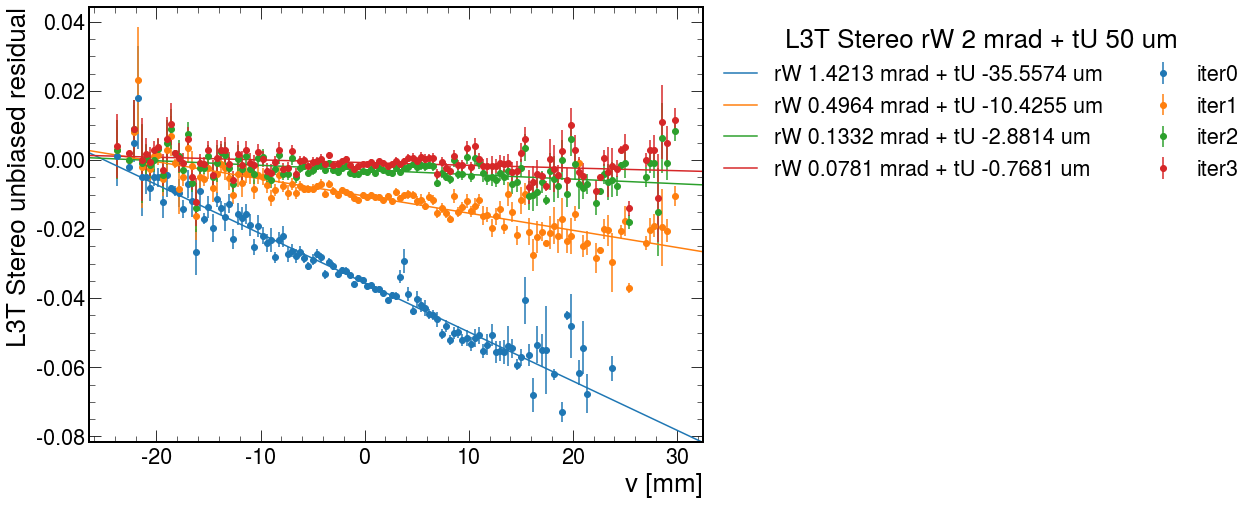

In [3]:
d.plot2d_profile_overlay('res/uresidual_GBL_vs_v_pred_module_L3t_halfmodule_stereo_sensor0',
                         xlabel='v [mm]', ylabel = 'L3T Stereo unbiased residual',
                         line_fit = True, draw_line = True,
                         legend_kw = dict(loc='upper left',bbox_to_anchor=(1,1),ncol=2),
                         #out_dir = 'data/kf/'
                        )

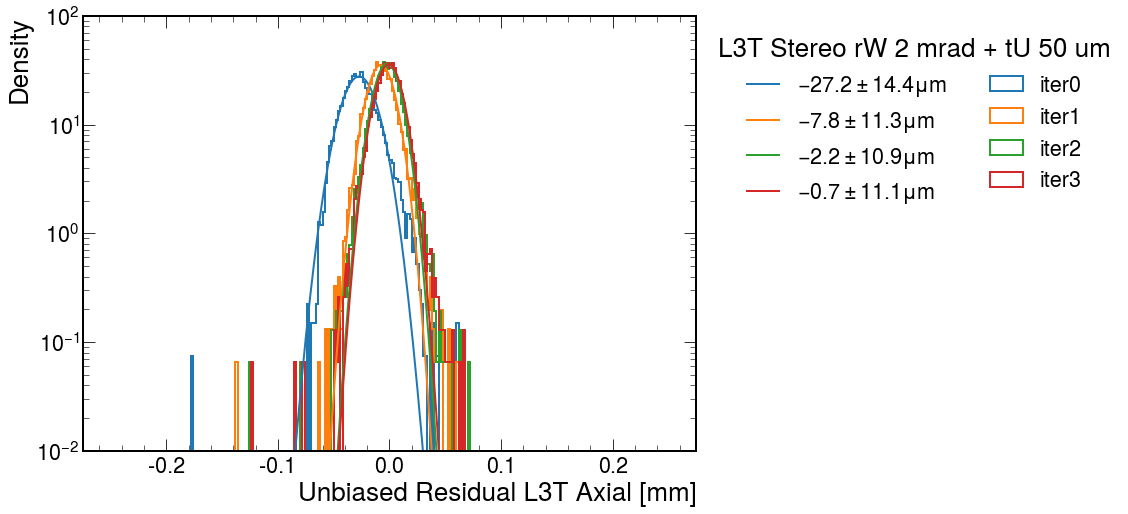

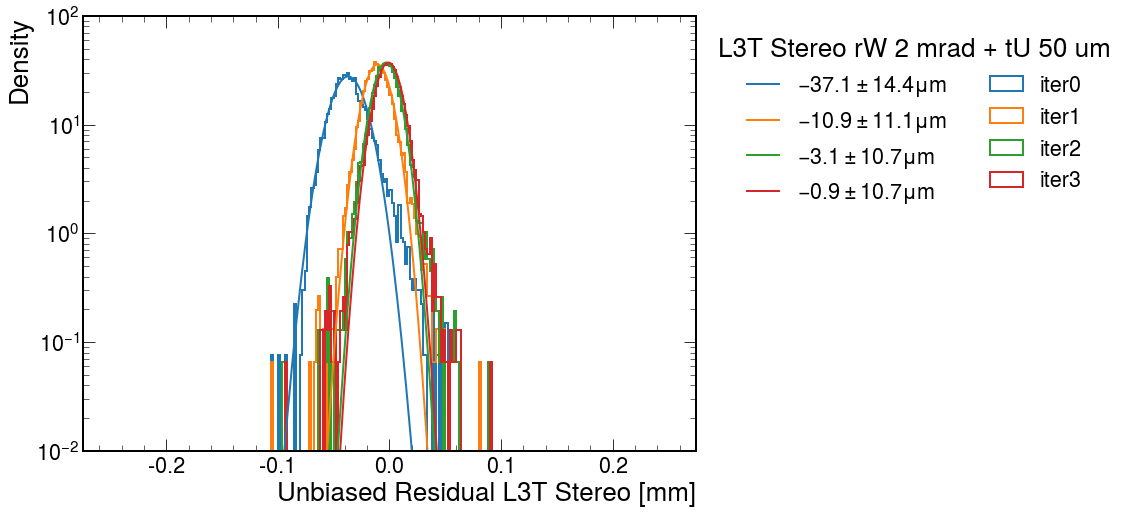

In [9]:
sensors = [
    ('L3T Axial', 'res/uresidual_GBL_module_L3t_halfmodule_axial_sensor0'),
    ('L3T Stereo', 'res/uresidual_GBL_module_L3t_halfmodule_stereo_sensor0'),
]
for name, hist in sensors :
    d.plot1d(hist, f'Unbiased Residual {name} [mm]', ylabel='Density', 
             yscale='log', ylim = (0.01,100),
             #yscale='linear',
            include_mean = 'iterative', draw_mean = True, density = True,
            legend_kw=dict(loc='upper left',bbox_to_anchor=(1.,1.), ncol=2),
            #out_dir = os.getcwd()
            )

# L2 Stereo tU 50um + Axial rW 2mrad
`11104` changes by `- 0.050` and `12303` by `+ 0.002`

How the parameters changed through the iterations:

Parameter | iter0 | iter1 | iter2 | Total
---|---|---|---|---
11104 | 44.438 | 5.0025 | 0.52996 | 49.97046
12303 | -1.9398 | -0.16674 | -0.02058 | -2.12712

In [31]:
d = Differ(
    'L2T Stereo tU 50 um + L2T Axial rW 2 mrad',
    *[
        (f'data/kf/L2TStereoRot_AxialTrans_iter{i}/gblplots.root',f'iter{i}')
        for i in range(3)
    ]
)

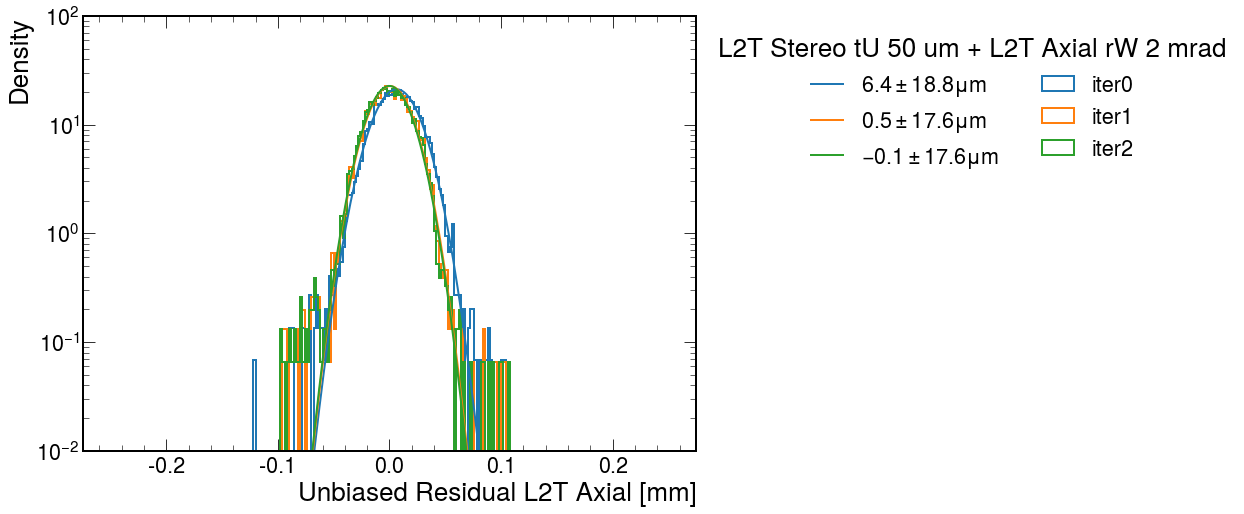

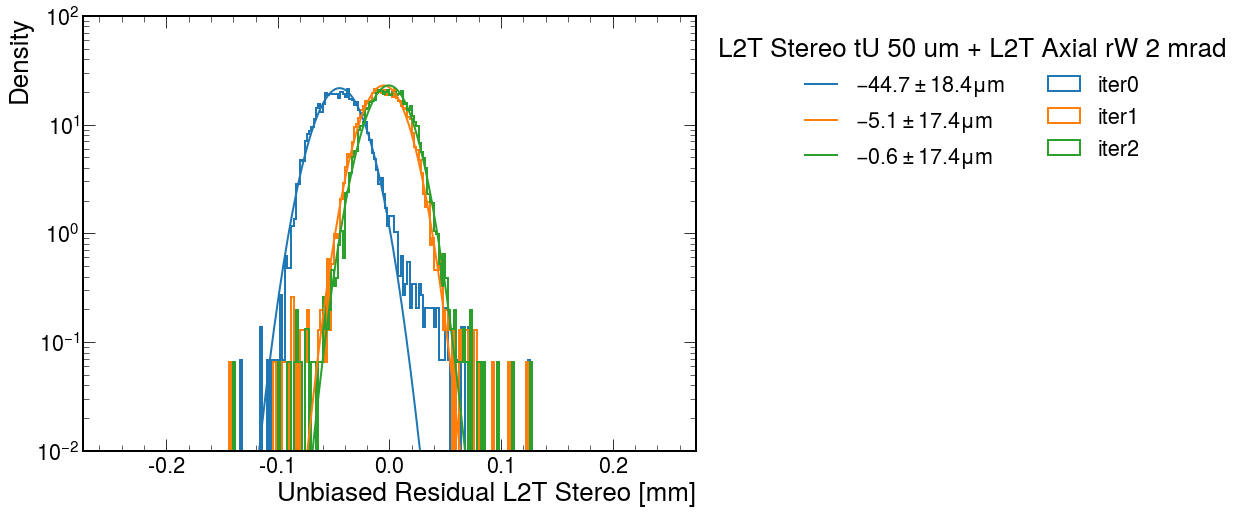

In [32]:
sensors = [
    ('L2T Axial', 'res/uresidual_GBL_module_L2t_halfmodule_axial_sensor0'),
    ('L2T Stereo', 'res/uresidual_GBL_module_L2t_halfmodule_stereo_sensor0'),
]
for name, hist in sensors :
    d.plot1d(hist, f'Unbiased Residual {name} [mm]', ylabel='Density', 
             yscale='log', ylim = (0.01,100),
             #yscale='linear',
            include_mean = 'iterative', draw_mean = True, density = True,
            legend_kw=dict(loc='upper left',bbox_to_anchor=(1.,1.), ncol=2),
            #out_dir = 'data/kf'
            )

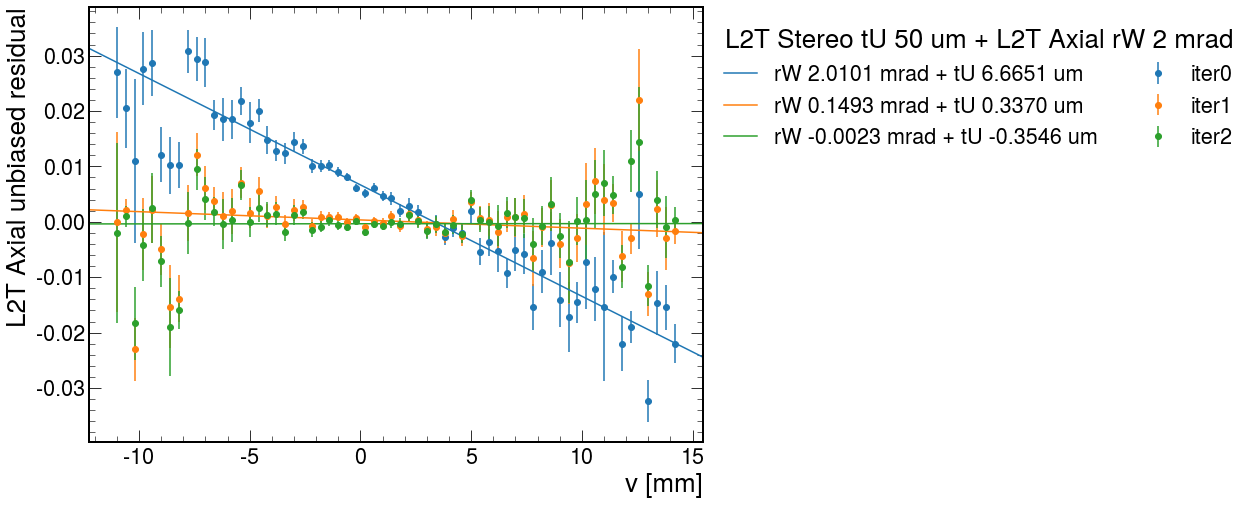

In [33]:
d.plot2d_profile_overlay('res/uresidual_GBL_vs_v_pred_module_L2t_halfmodule_axial_sensor0',
                         xlabel='v [mm]', ylabel = 'L2T Axial unbiased residual',
                         line_fit = True, draw_line = True,
                         legend_kw = dict(loc='upper left',bbox_to_anchor=(1,1),ncol=2),
                         #out_dir = 'data/kf/'
                        )